# Abalone data eda analysis 

* 데이터 출처 : https://www.kaggle.com/datasets/rodolfomendes/abalone-dataset
* 전복 데이터 셋

* 전복의 나이테를 추측할 수 있도록 전처리하는 작업 및 데이터 탐색 분석

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
df = pd.read_csv("./data/abalone.csv")
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


## 데이터 확인

* 데이터 정보 확인
* null 값 없음 확인

In [159]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [161]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

* 요약 통계량 확인
* height 부분에서 최솟값이 0인 경우가 있다.
    * 두께가 0일수가 없기 때문에, 두께가 0보다 큰 값으로만 데이터를 추출

In [164]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [166]:
df = df[df['Height'] > 0]
df.Height.min()

np.float64(0.01)

In [168]:
df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4175.000000,4175.00000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000,4175.000000
mean,0.524065,0.40794,0.139583,0.829005,0.359476,0.180653,0.238834,9.935090
std,0.120069,0.09922,0.041725,0.490349,0.221954,0.109605,0.139212,3.224227
min,0.075000,0.05500,0.010000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.35000,0.115000,0.442250,0.186250,0.093500,0.130000,8.000000
50%,0.545000,0.42500,0.140000,0.800000,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.48000,0.165000,1.153500,0.502000,0.253000,0.328750,11.000000
max,0.815000,0.65000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


* 최빈값 확인
* 중간값 = 평균 = 최빈값 --> 정규성에 가깝다.

In [171]:
df.mode()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.550,0.45,0.15,0.2225,0.175,0.1715,0.275,9.0
1,NaN,0.625,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 상관관계 파악

* 전체적인 데이터 분포도 파악

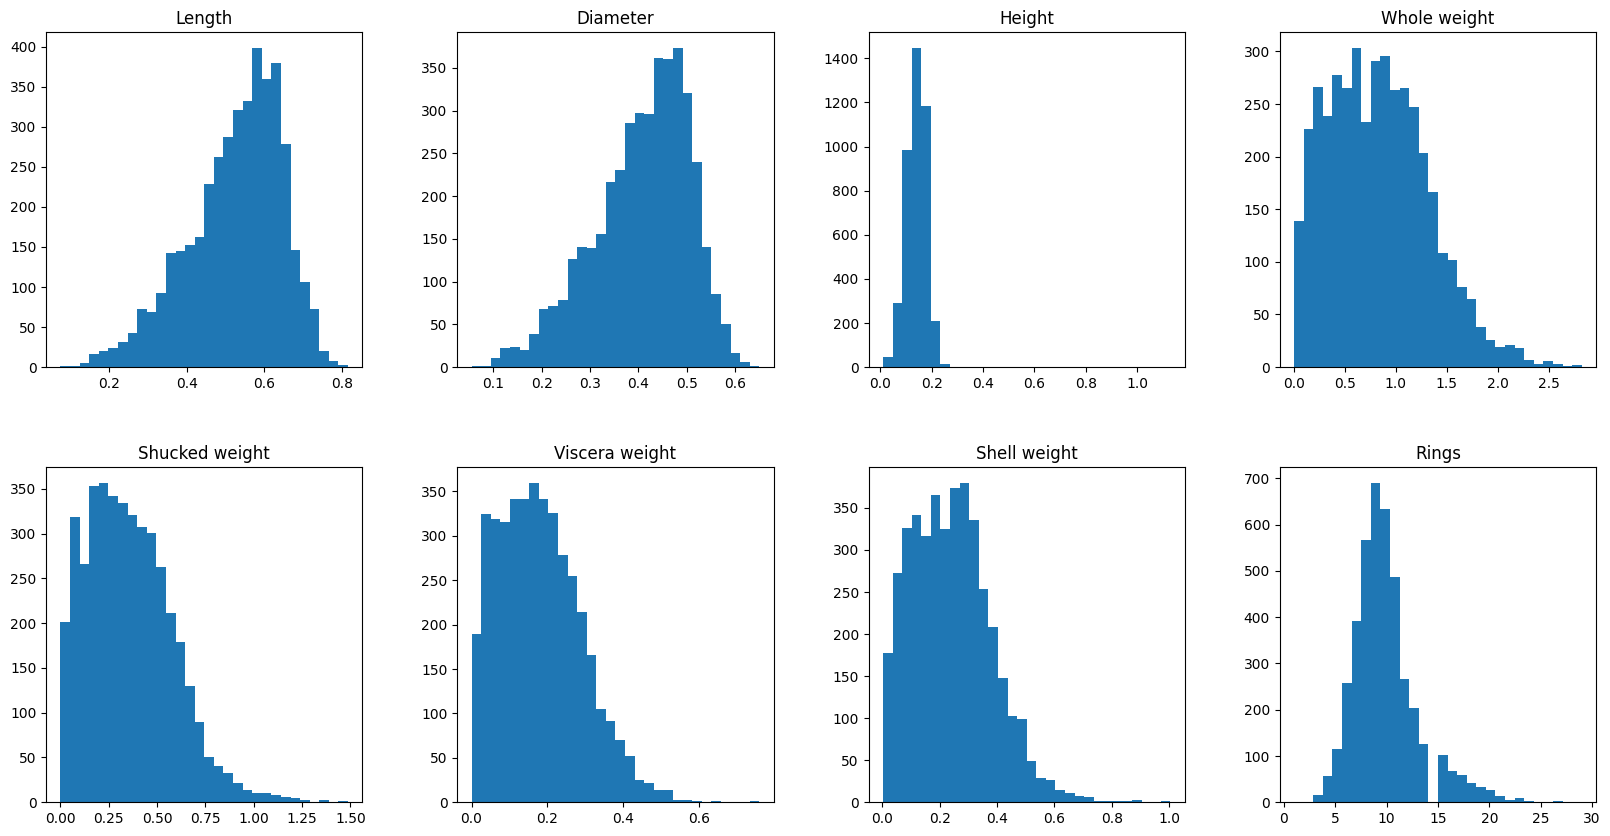

In [175]:
df.hist(figsize=(20, 10), grid=False, layout=(2, 4), bins = 30)
plt.show()

* 전체적으로 Length와 Diameter가 양의 상관관계를 갖고 있으며, Whole weight는 Shucked weight, Viscera weight, Shell weight와 양의 상관관계를 갖고 있다.

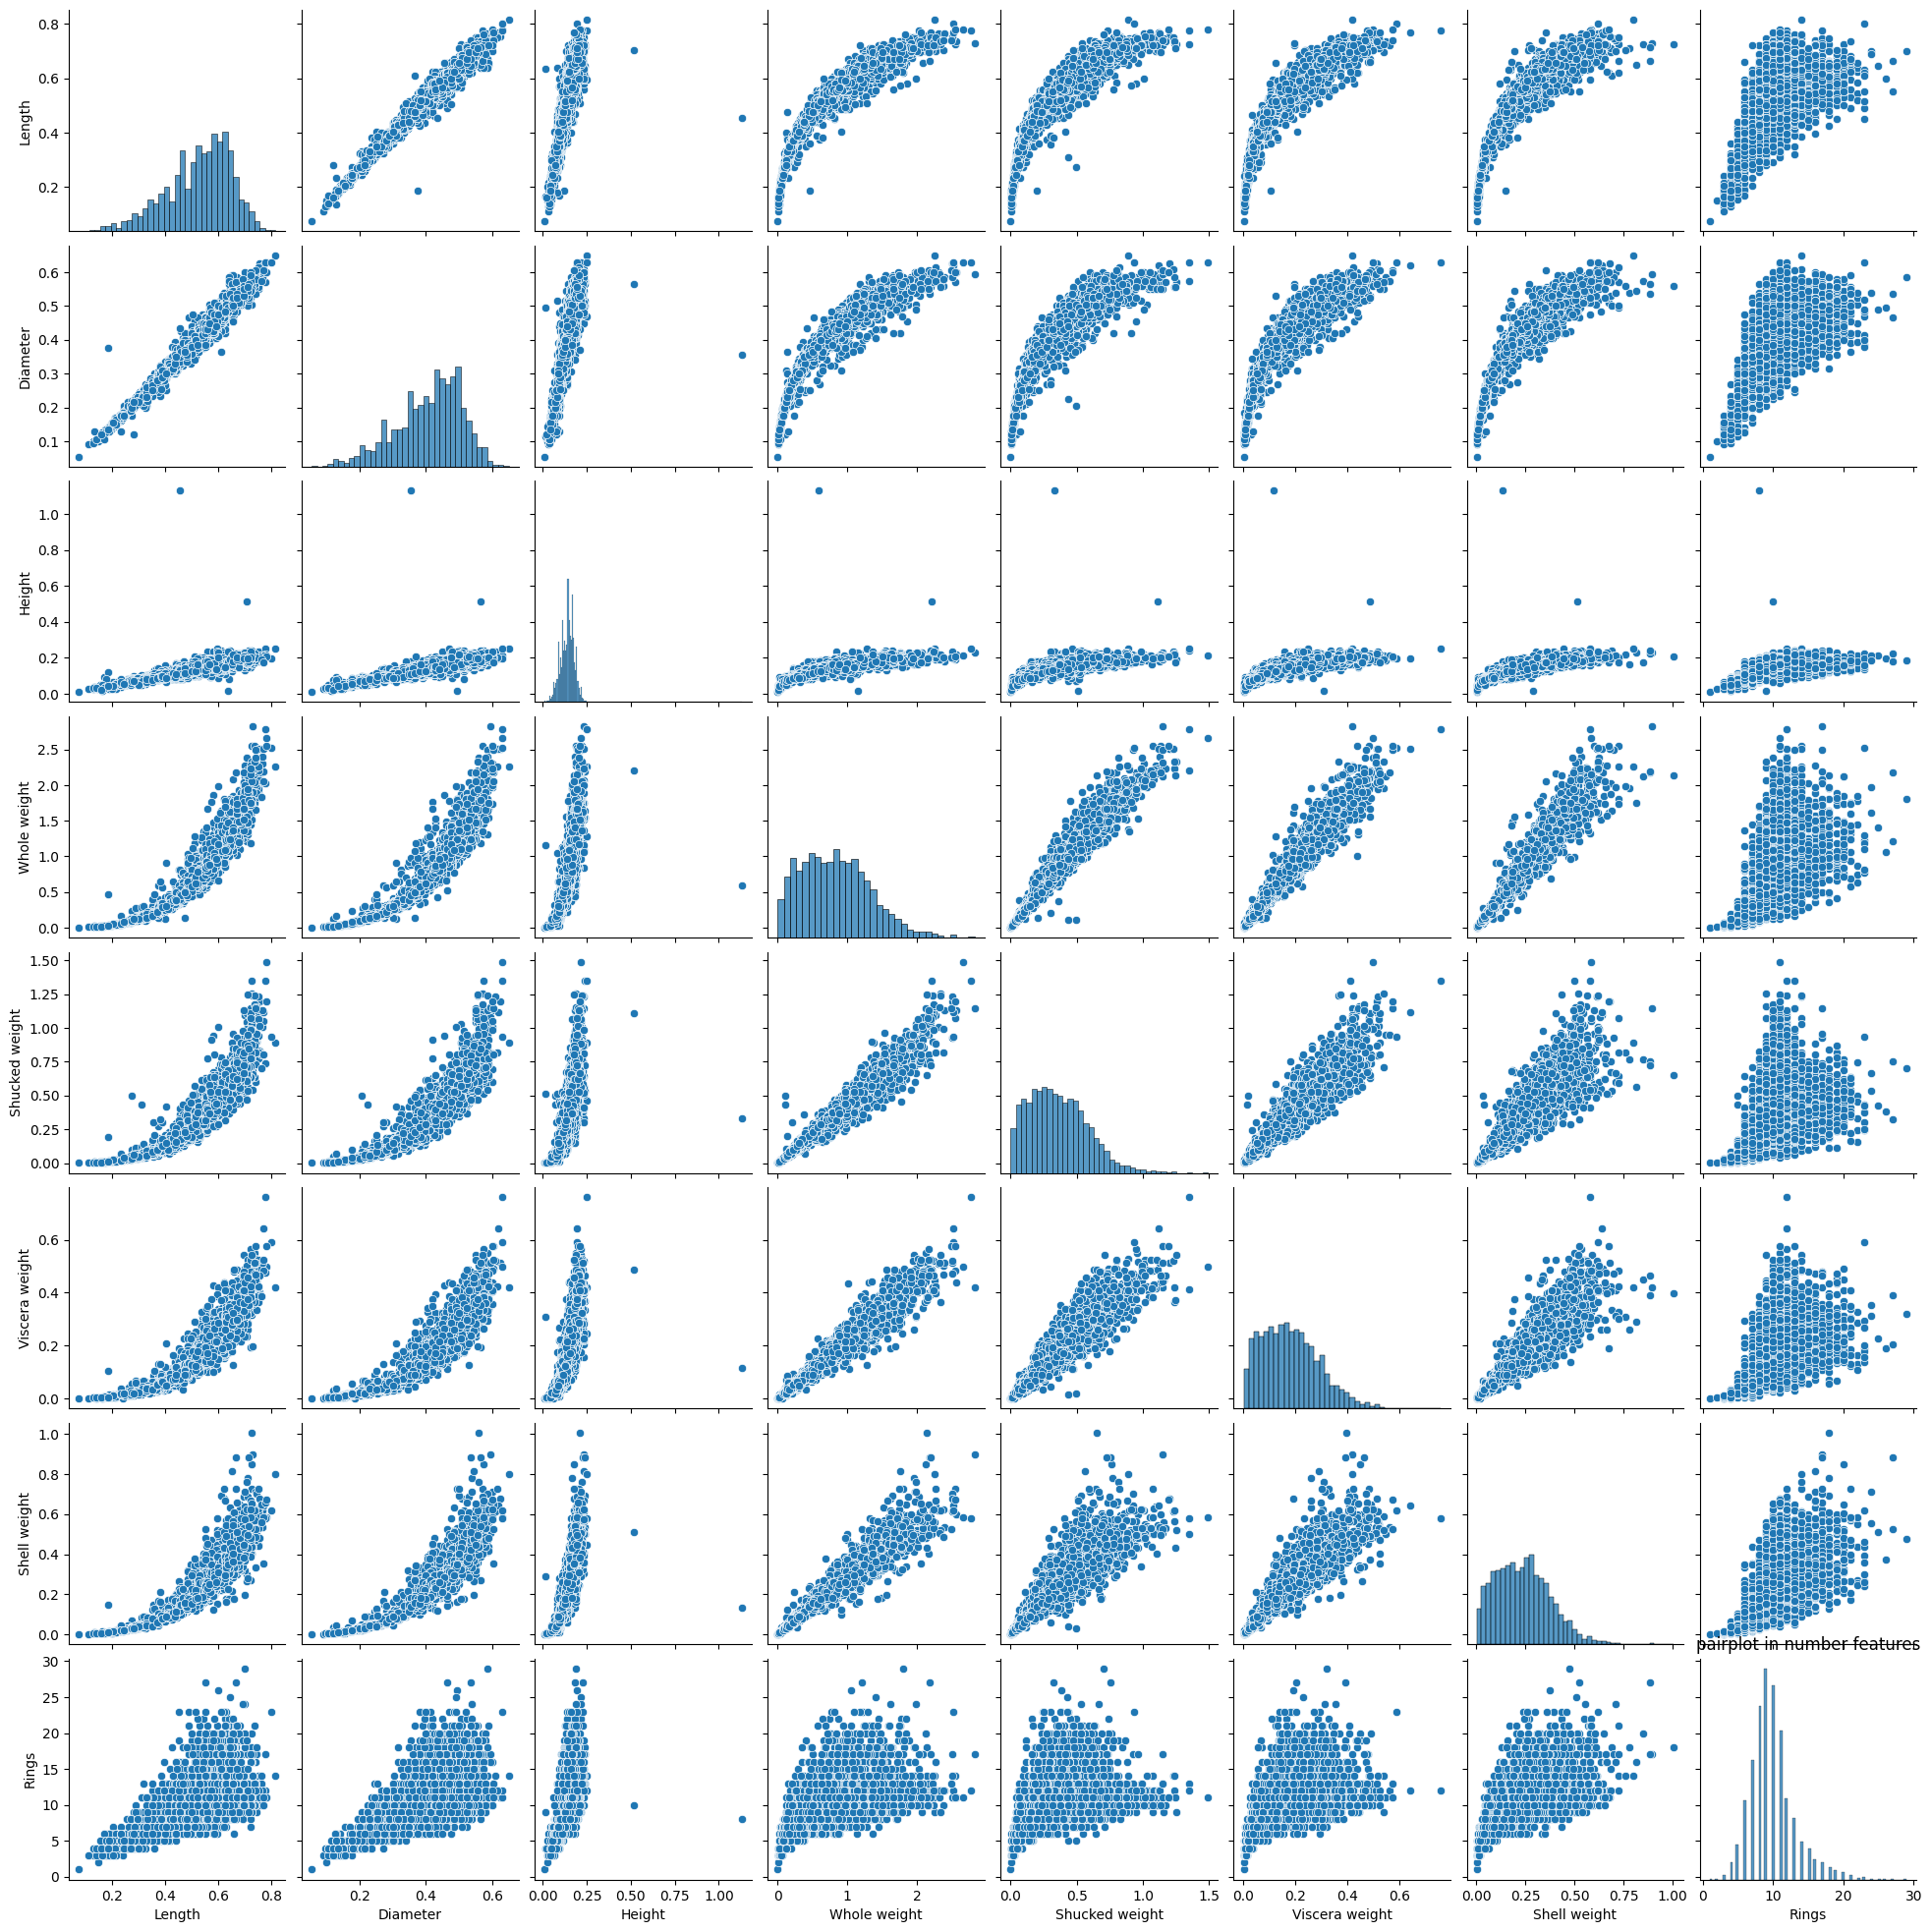

In [177]:
num_features = df.select_dtypes(include=[np.number]).columns
sns.pairplot(df[num_features])
plt.title("pairplot in number features")
plt.show()

## 이상치 확인

* 각 숫자 데이터 컬럼의 scatter를 그려 이상치를 확인한다.

* Shell weight 같은 경우, Shell weight가 0.6 이상, 나이테는 25보다 큰 부분이 된다.

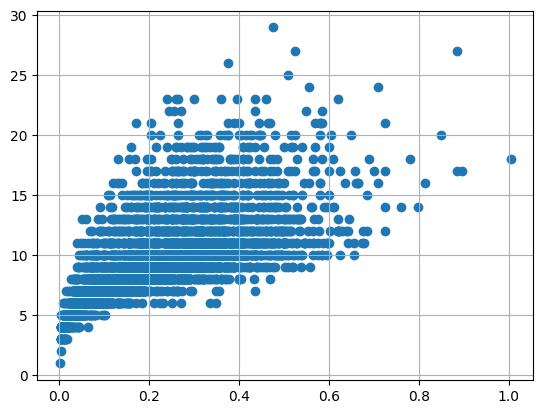

In [181]:
var = "Shell weight"
plt.scatter(x = df[var], y = df['Rings'])
plt.grid()
plt.show()

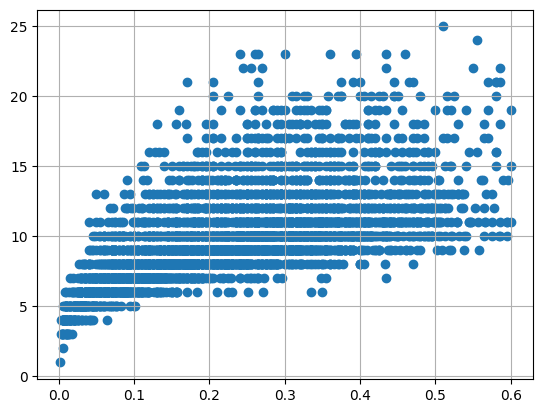

In [182]:
var = "Shell weight"
df.drop(df[(df[var] > 0.6) & (df["Rings"] < 25)].index, inplace=True)
df.drop(df[(df[var] < 0.6) & (df["Rings"] > 25)].index, inplace=True)
df.drop(df[(df[var] > 0.8) & (df["Rings"] > 25)].index, inplace=True)
plt.scatter(x = df[var], y = df['Rings'])
plt.grid()
plt.show()

* Viscera weight 같은 경우, 무게는 0.5 초과 나이테는 25 이상인 것을 삭제

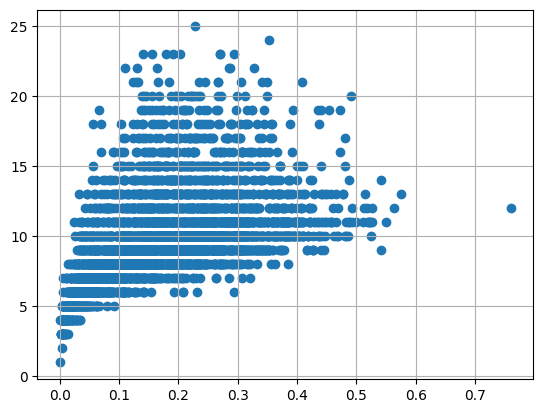

In [185]:
var = 'Viscera weight'
plt.scatter(x = df[var], y = df["Rings"])
plt.grid(True)

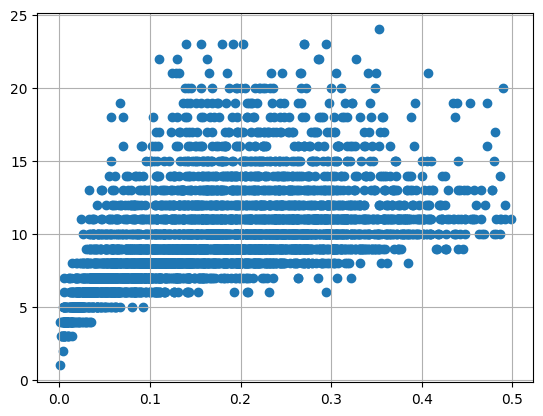

In [186]:
var = 'Viscera weight'

df.drop(df[(df[var] > 0.5) & (df["Rings"] < 25)].index, inplace=True)
df.drop(df[(df[var] < 0.5) & (df["Rings"] >= 25)].index, inplace=True)

plt.scatter(x = df[var], y = df["Rings"])
plt.grid(True)

* Shucked weight 같은 경우, 무게는 1 이상 나이테는 20 이하인 것을 삭제

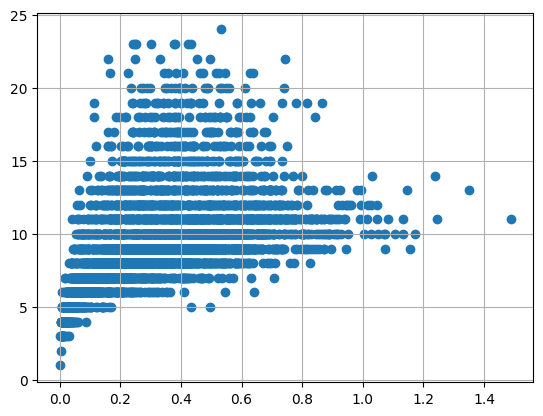

In [188]:
var = 'Shucked weight'
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

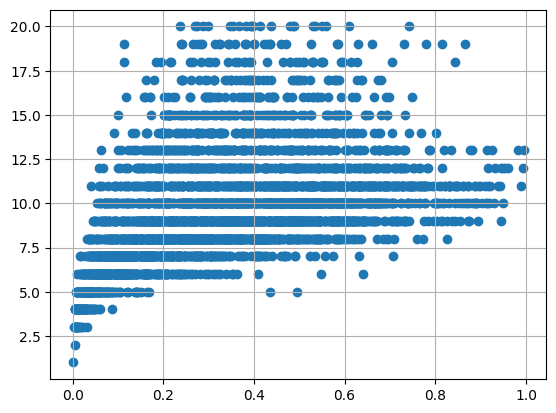

In [189]:
var = 'Shucked weight'
df.drop(df[(df[var] >= 1) & (df['Rings'] < 20)].index, inplace=True)
df.drop(df[(df[var] < 1) & (df['Rings'] > 20)].index, inplace=True)
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

* Whole weight 같은 경우, 무게 2 초과, 나이테 20개 이하 삭제

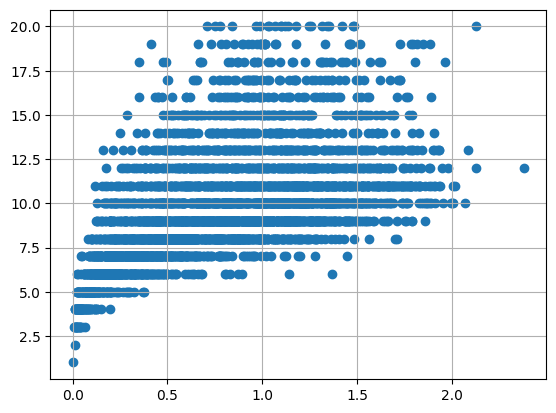

In [191]:
var = 'Whole weight'
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

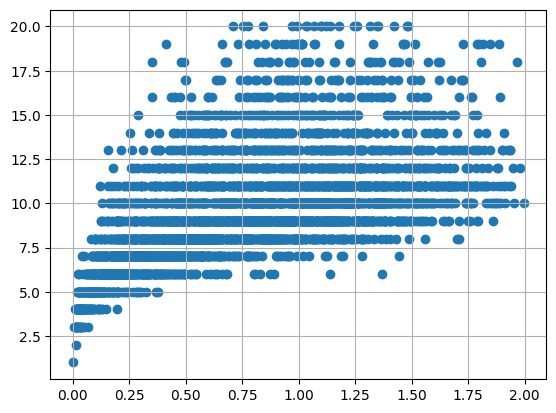

In [192]:
var = 'Whole weight'
df.drop(df[(df[var] > 2) & (df['Rings'] <= 20)].index, inplace=True)
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

* Diameter 같은 경우, 무게 0.1이하, 나이테가 2.5를 넘지 않는 것을 삭제

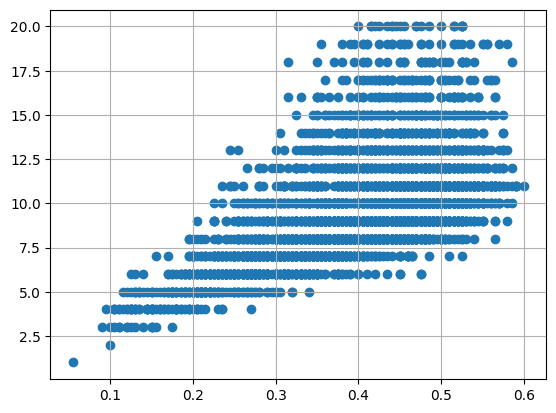

In [194]:
var = 'Diameter'
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

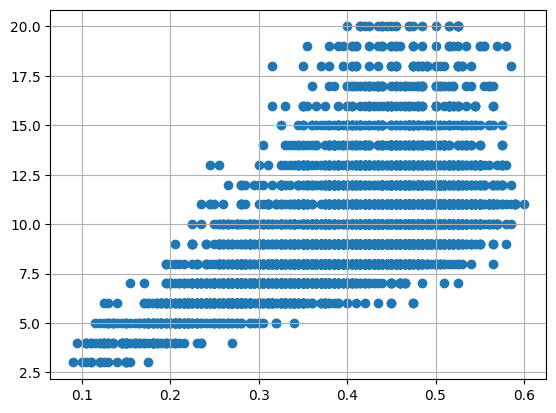

In [195]:
var = 'Diameter'
df.drop(df[(df[var] <= 0.1) & (df['Rings'] < 2.5)].index, inplace=True)
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

* height 0.4 이상인 데이터 삭제

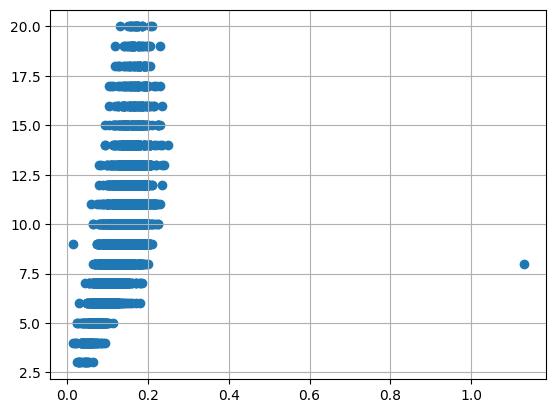

In [197]:
var = 'Height'
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

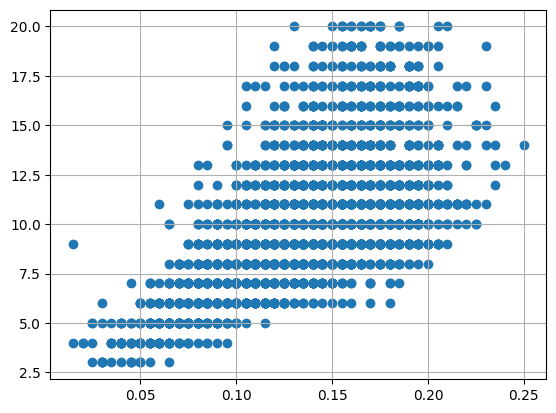

In [198]:
var = 'Height'
df.drop(df[(df[var] > 0.4) & (df['Rings'] < 10)].index, inplace=True)
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

* Length 값은 이상치가 존재하지 않는다.

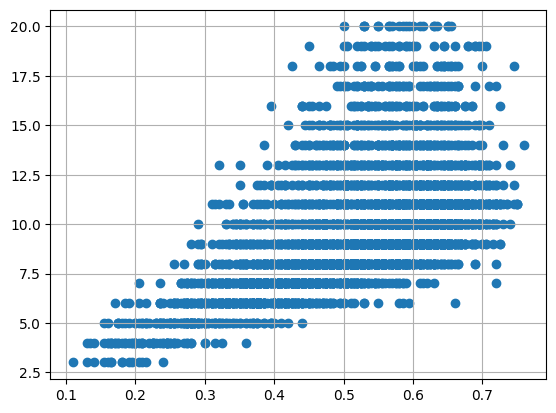

In [200]:
var = 'Length'
plt.scatter(x = df[var], y = df["Rings"])
plt.grid()

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4041 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4041 non-null   object 
 1   Length          4041 non-null   float64
 2   Diameter        4041 non-null   float64
 3   Height          4041 non-null   float64
 4   Whole weight    4041 non-null   float64
 5   Shucked weight  4041 non-null   float64
 6   Viscera weight  4041 non-null   float64
 7   Shell weight    4041 non-null   float64
 8   Rings           4041 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 315.7+ KB


* 기존 4177개의 데이터에서 이상치를 제거한 4041개의 데이터만 남음 (약 96.7% 데이터 생존)

## 데이터 시각화

* 수컷의 수가 가장 많고, 암컷과 유아의 개수가 비슷하게 구성되어 있다.

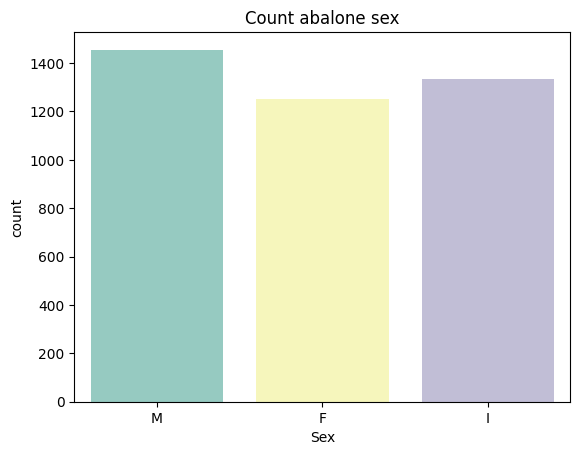

In [220]:
sns.countplot(x="Sex", hue="Sex", data=df, palette='Set3', legend=False)
plt.title("Count abalone sex")
plt.show()

* 나이테 별로 전복의 개수를 확인
* 나이테가 9개인 전복이 많다

In [223]:
df.groupby("Rings").size()

Rings
3      15
4      57
5     115
6     258
7     391
8     566
9     686
10    620
11    468
12    245
13    196
14    118
15    102
16     61
17     51
18     38
19     32
20     22
dtype: int64

* 평균적으로 껍질 무게가 가장 많이나가는 나이테 개수는 20개이고, 가장 적은 나이테 수는 1개이다.
* 대체적으로 나이테 개수가 많아질수록 무게가 많이 나간다.

In [226]:
df.groupby('Rings')[['Shucked weight', 'Whole weight', 'Shell weight']].mean()

,Shucked weight,Whole weight,Shell weight
Rings,,,
3,0.011767,0.028400,0.008933
4,0.024719,0.059605,0.018000
5,0.061696,0.125500,0.036770
6,0.123413,0.273713,0.077333
7,0.182657,0.397386,0.111648
8,0.293860,0.641211,0.178801
9,0.384560,0.846040,0.235241
10,0.434714,0.983545,0.277123
11,0.482252,1.100036,0.310632


* 수컷 전복이 암컷 전복보다 평균적으로 나이테와 무게면에서 더 높은 수치를 보여준다.

In [229]:
df.groupby("Sex")[['Rings', 'Shucked weight', 'Whole weight', 'Shell weight']].mean()

,Rings,Shucked weight,Whole weight,Shell weight
Sex,,,,
F,10.884800,0.433880,1.012761,0.290645
I,7.889970,0.190824,0.430626,0.127716
M,10.502405,0.411224,0.941959,0.268031


## 상관관계 분석

* 기본적으로 나이테 개수와 비교하여 껍질 무게, 길이, 직경, 두께 등이 양의 상관관계를 가지고 있다.
* 다만, 비교적 전복 순살 무게만이 낮은 상관관계를 가지고 있다.

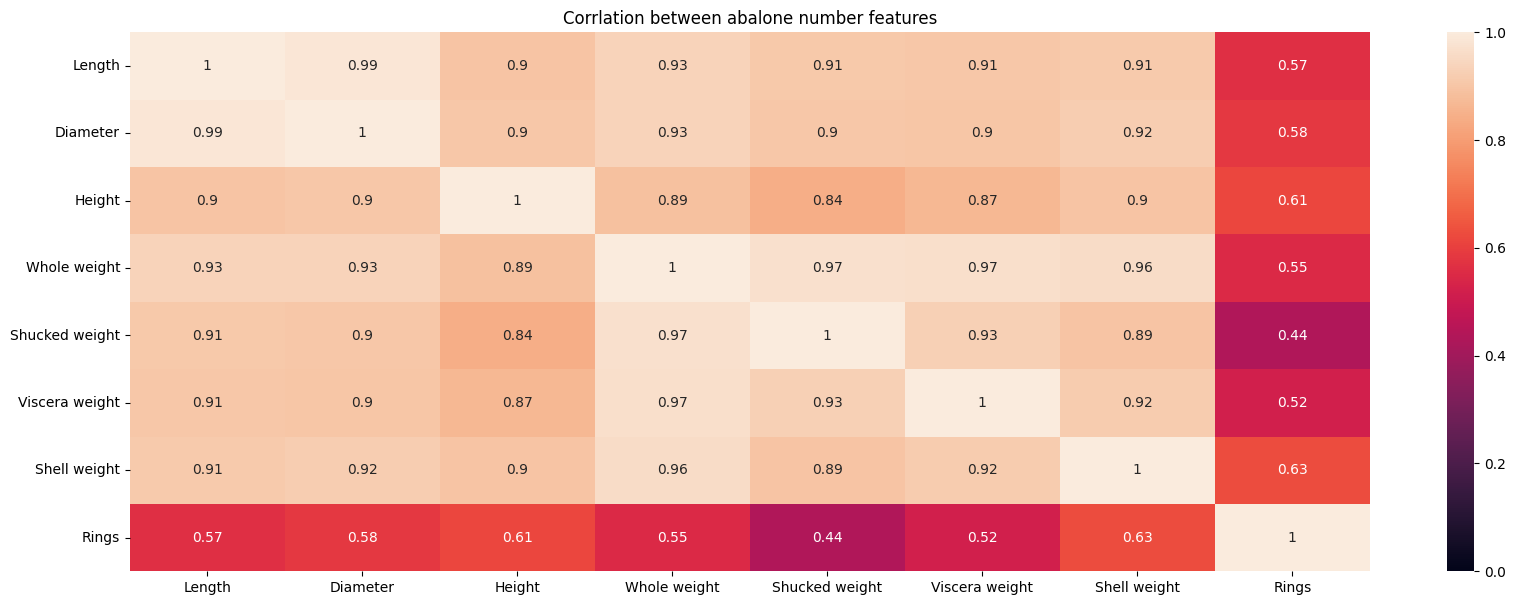

In [236]:
plt.figure(figsize=(20, 7))
sns.heatmap(df[num_features].corr(), annot=True, vmin=0, vmax=1)
plt.title("Corrlation between abalone number features")
plt.show()